In [109]:
import os
# local
project_dir = '/Users/jh7685/Documents/Projects/hcp-annot-vc'
cache_path = f'{project_dir}/data_hcp-annot-vc'
image_cache_path = f'{cache_path}/annot-images'
v123_cache_path  = f'{cache_path}/annot-v123'
csulc_cache_path = f'{cache_path}/annot-csulc'
trace_dir = f'{cache_path}/save'
labels_path = f'{cache_path}/results/labels'
path_cache_dir = '/Volumes/server/Projects/annot-vc/derivatives/path_files'
derivatives_dir = '/Volumes/server/Projects/annot-vc/derivatives'
fig_dir = os.path.join(derivatives_dir, 'figures')

In [100]:
trace_dir

'/Users/jh7685/Documents/Projects/hcp-annot-vc/data_hcp-annot-vc/save'

In [101]:
import os
os.environ['HCPANNOT_LOAD_PATH'] = cache_path
import sys
sys.path.append('..')
from visualization import plot_contours as viscontours
import neuropythy as ny
import numpy as np
import itertools
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
# Now we can import the hcp-annot-vc library.
import hcpannot
hcpannot.interface.default_load_path = cache_path

In [103]:
researcher_list = ['BrendaQiu',
              'bogengsong',
              'JiyeongHa',
              'lindazelinzhao',
              'nourahboujaber',
              'jennifertepan']
roi_list = ['hV4','VO1','VO2']
hemi_list = ['lh','rh']
trace_list = ['hV4', 'hV4_VO1', 'VO1_VO2', 'VO_outer']


# Get trace .json files

In [104]:
traces_df = pd.DataFrame({})
for hemi, trace, researcher in itertools.product(hemi_list, trace_list, researcher_list):
    tmp_df = pd.DataFrame({})
    trace_path_list = viscontours.get_trace_list_drawn_by_rater(trace_dir,
                                                                hemi,
                                                                trace,
                                                                researcher,
                                                                return_full_path=True)
    tmp_df['sid'] = [int(k.split('/')[-2]) for k in trace_path_list]
    tmp_df['researcher'] = researcher
    tmp_df['trace'] = trace
    tmp_df['hemi'] = hemi
    traces_df = traces_df.append(tmp_df)



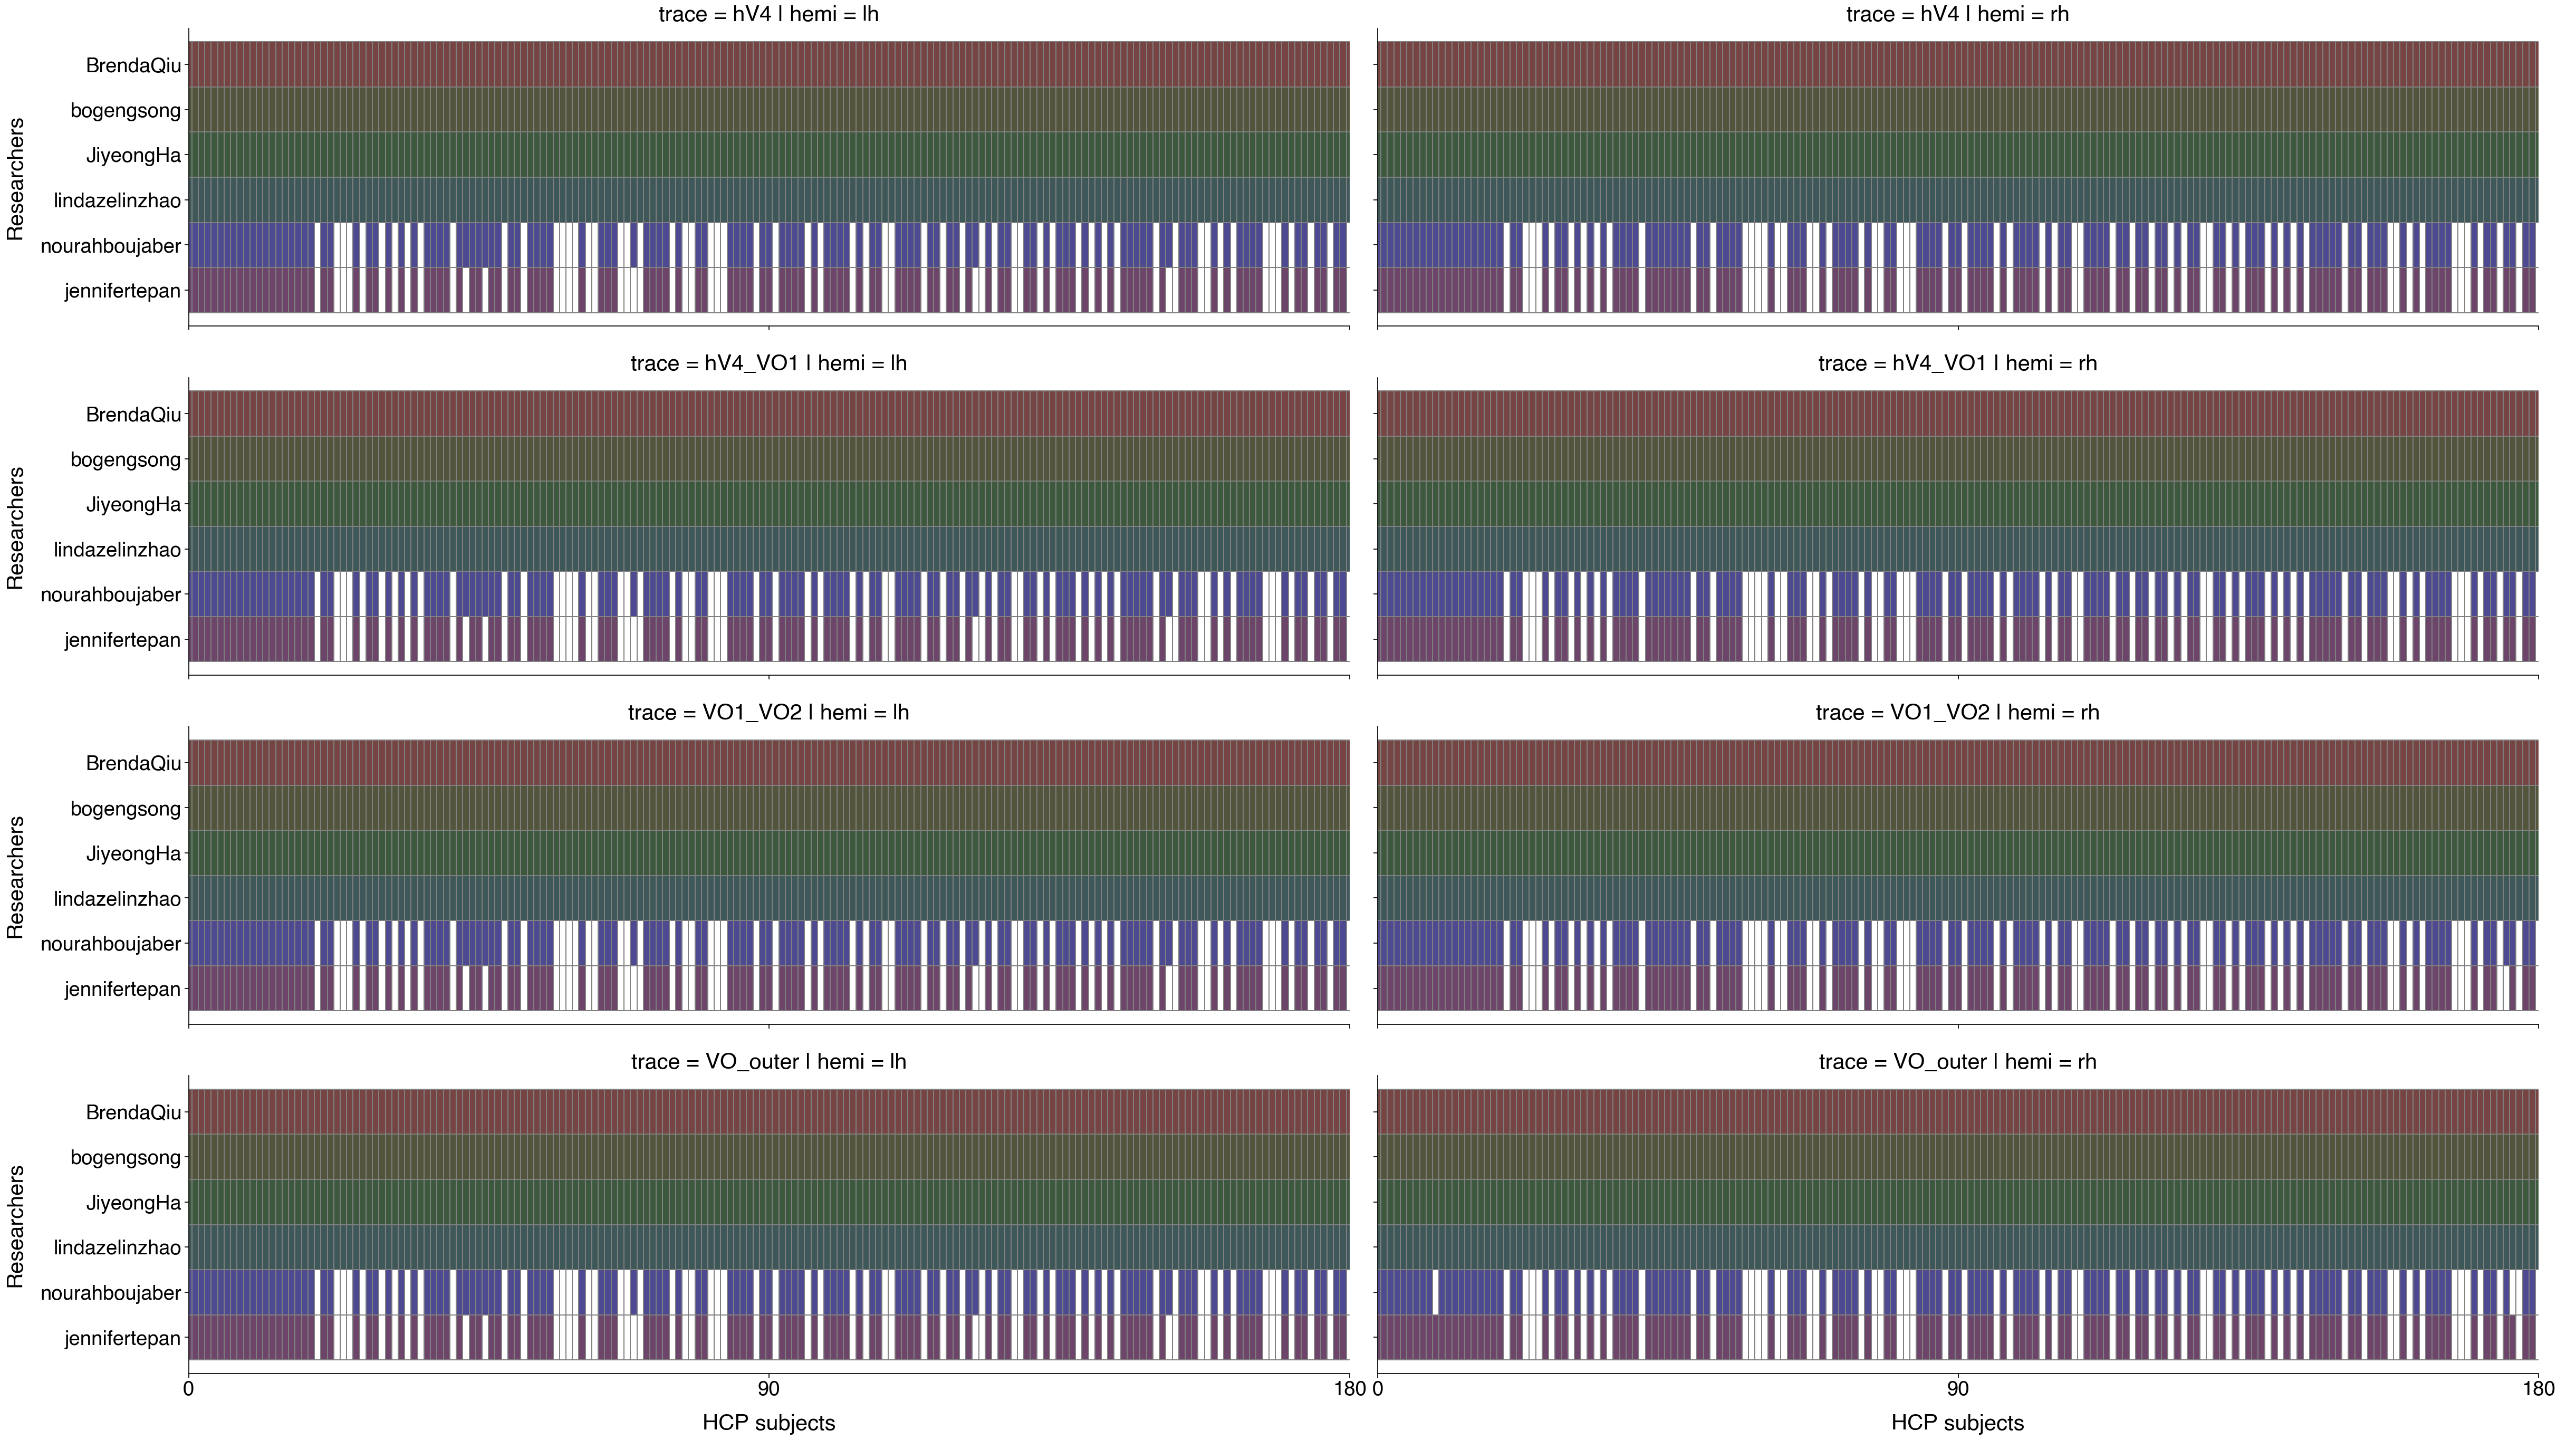

In [108]:
output_path = os.path.join(fig_dir, 'sids_check', 'counts-traces.png')
viscontours.check_sids(df=traces_df,
                       sid='sid', y='researcher',
                       col='hemi', col_order=hemi_list,
                       row='trace', row_order=trace_list,
                       height=7,
                       hue='researcher', hue_order=researcher_list, save_path=output_path)

# Get Path files

In [ ]:
traces_df = pd.DataFrame({})
for hemi, trace, researcher in itertools.product(hemi_list, trace_list, researcher_list):
    tmp_df = pd.DataFrame({})
    trace_path_list = viscontours.get_trace_list_drawn_by_rater(trace_dir,
                                                                hemi,
                                                                trace,
                                                                researcher,
                                                                return_full_path=True)
    tmp_df['sid'] = [int(k.split('/')[-2]) for k in trace_path_list]
    tmp_df['researcher'] = researcher
    tmp_df['trace'] = trace
    tmp_df['hemi'] = hemi
    traces_df = traces_df.append(tmp_df)

